# Importing libraries
tensorflow for neural network
numpy for array operations
pandas for dataframe operations

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_addons as tfa

# loading dataset from the system

In [2]:
crop_dataset = pd.read_csv("Crop_recommendation.csv")

# Analyzing dataset

In [3]:
crop_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
print(crop_dataset['label'].unique())
print(crop_dataset['label'].nunique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
22


In [5]:
crop_dataset['label'].nunique()

22

### Correlation analysis of each feature with eachother

<ipython-input-6-702499f9addf>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop_dataset_corr = crop_dataset.corr()


<AxesSubplot: >

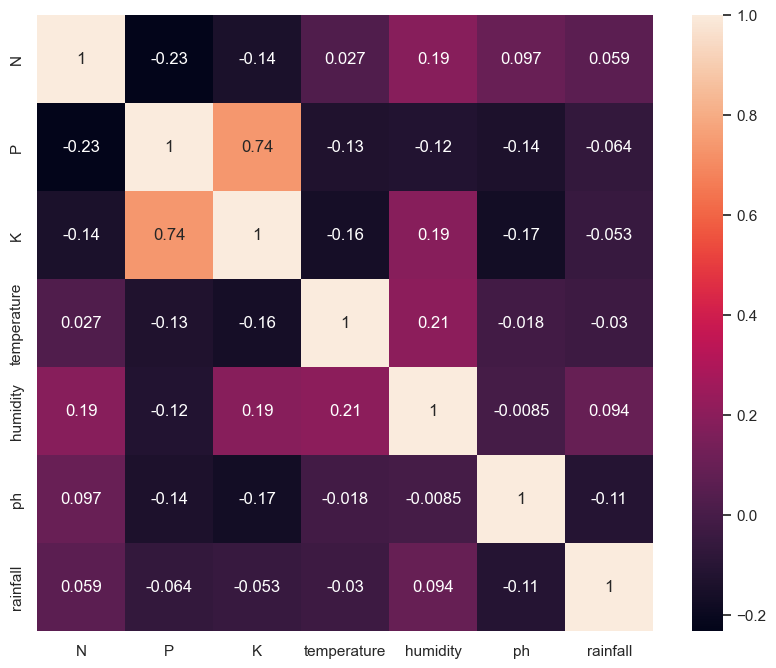

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

crop_dataset_corr = crop_dataset.corr()
sns.set(rc={'figure.figsize': (10, 8)})
sns.heatmap(crop_dataset_corr, annot = True, square = True)

## Splitting data

In [7]:
from sklearn.model_selection import train_test_split

X, y = crop_dataset.iloc[:, :-1], crop_dataset.iloc[:, -1]

X_train_models, X_test_models, y_train_models, y_test_models = train_test_split(X, y, test_size= 0.4)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(multi_class= 'multinomial', solver= 'lbfgs')

lr.fit(X_train_models, y_train_models)

lr_accuracy = cross_val_score(lr, X_test_models, y_test_models, scoring='accuracy', n_jobs=-1)

print(np.mean(lr_accuracy))

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9511363636363637


## SVM

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_models, y_train_models)
poly = SVC(kernel='poly', degree=3, C=1).fit(X_train_models, y_train_models)

rbf_accuracy = cross_val_score(rbf, X_test_models, y_test_models, scoring='accuracy', n_jobs=-1)
poly_accuracy = cross_val_score(poly, X_test_models, y_test_models, scoring='accuracy', n_jobs=-1)

print(f"SVM accuracy using rbf kernel: {np.mean(rbf_accuracy)}")
print(f"SVM accuracy using polynomial kernel: {np.mean(poly_accuracy)}")

SVM accuracy using rbf kernel: 0.0625
SVM accuracy using polynomial kernel: 0.9727272727272727


## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)

gini.fit(X_train_models, y_train_models)
entropy.fit(X_train_models, y_train_models)

gini_accuracy = cross_val_score(gini, X_test_models, y_test_models, scoring='accuracy', n_jobs=-1)
entropy_accuracy = cross_val_score(entropy, X_test_models, y_test_models, scoring='accuracy', n_jobs=-1)

print(f"Decisition Tree Classification using gini accuracy: {np.mean(gini_accuracy)}")
print(f"Decision Tree Classification using entropy accuracy: {np.mean(entropy_accuracy)}")

Decisition Tree Classification using gini accuracy: 0.2772727272727273
Decision Tree Classification using entropy accuracy: 0.38977272727272727


## LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda_accuracy = cross_val_score(lda, X_test_models, y_test_models, scoring='accuracy', n_jobs=-1)

print(f"LDA accuracy {np.mean(lda_accuracy)}")

LDA accuracy 0.9625


# Converting categorical data into numeric

In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

crop_dataset_encoded = pd.DataFrame(ohe.fit_transform(crop_dataset[['label']]).toarray())

crop_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2200 non-null   float64
 1   1       2200 non-null   float64
 2   2       2200 non-null   float64
 3   3       2200 non-null   float64
 4   4       2200 non-null   float64
 5   5       2200 non-null   float64
 6   6       2200 non-null   float64
 7   7       2200 non-null   float64
 8   8       2200 non-null   float64
 9   9       2200 non-null   float64
 10  10      2200 non-null   float64
 11  11      2200 non-null   float64
 12  12      2200 non-null   float64
 13  13      2200 non-null   float64
 14  14      2200 non-null   float64
 15  15      2200 non-null   float64
 16  16      2200 non-null   float64
 17  17      2200 non-null   float64
 18  18      2200 non-null   float64
 19  19      2200 non-null   float64
 20  20      2200 non-null   float64
 21  21      2200 non-null   float64
dtype

# Splitting data into dependent and independent

In [14]:
X = crop_dataset.iloc[:, :-1]
y = crop_dataset_encoded

In [15]:
print(y.shape)
print(X.shape)

(2200, 22)
(2200, 7)


# Splitting training and testing data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [17]:
X.shape

(2200, 7)

# Scaling Data

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Comparison of support vector machine, artificial neural network, and spectral angle mapper algorithms for crop classification using LISS IV data ANN Model Recreation

In [43]:
ann_recreation1 = tf.keras.models.Sequential()

ann_recreation1.add(tf.keras.layers.Dense(units = 13, activation = 'relu'))
ann_recreation1.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
ann_recreation1.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.1), loss = 'categorical_crossentropy', metrics = ["accuracy"])

ann_recreation1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000)

print(f"ANN accuracy according to the above research paper: {np.mean(ann_recreation1.history.history['val_accuracy'])}")

Epoch 1/1000


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


42/42 [==============================] - 1s 15ms/step - loss: 1.0071 - accuracy: 0.6591 - val_loss: 0.3078 - val_accuracy: 0.8864
Epoch 2/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.2508 - accuracy: 0.9114 - val_loss: 0.1456 - val_accuracy: 0.9489
Epoch 3/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.1726 - accuracy: 0.9439 - val_loss: 0.1309 - val_accuracy: 0.9568
Epoch 4/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.1576 - accuracy: 0.9394 - val_loss: 0.2715 - val_accuracy: 0.9239
Epoch 5/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.2021 - accuracy: 0.9371 - val_loss: 0.1757 - val_accuracy: 0.9295
Epoch 6/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.1710 - accuracy: 0.9371 - val_loss: 0.2113 - val_accuracy: 0.9205
Epoch 7/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.1094 - accuracy: 0.9629 - val_loss: 0.1456 - val_accuracy: 0.9420
Epoch 8/1000

42/42 [==============================] - 1s 12ms/step - loss: 0.0681 - accuracy: 0.9848 - val_loss: 0.1396 - val_accuracy: 0.9739
Epoch 59/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.1431 - val_accuracy: 0.9784
Epoch 60/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0384 - accuracy: 0.9871 - val_loss: 0.1433 - val_accuracy: 0.9727
Epoch 61/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0331 - accuracy: 0.9886 - val_loss: 0.1479 - val_accuracy: 0.9716
Epoch 62/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0275 - accuracy: 0.9894 - val_loss: 0.1480 - val_accuracy: 0.9750
Epoch 63/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0323 - accuracy: 0.9879 - val_loss: 0.1419 - val_accuracy: 0.9693
Epoch 64/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0259 - accuracy: 0.9909 - val_loss: 0.1510 - val_accuracy: 0.9739
Epoch 

Epoch 115/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0855 - accuracy: 0.9818 - val_loss: 0.7537 - val_accuracy: 0.9455
Epoch 116/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.2622 - accuracy: 0.9583 - val_loss: 0.5350 - val_accuracy: 0.9557
Epoch 117/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.2932 - accuracy: 0.9674 - val_loss: 0.3212 - val_accuracy: 0.9705
Epoch 118/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.1048 - accuracy: 0.9803 - val_loss: 0.5453 - val_accuracy: 0.9545
Epoch 119/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0980 - accuracy: 0.9795 - val_loss: 0.3076 - val_accuracy: 0.9795
Epoch 120/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0499 - accuracy: 0.9894 - val_loss: 0.2845 - val_accuracy: 0.9705
Epoch 121/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0456 - accuracy: 0.9871 - val_loss: 0.3298 - val_ac

42/42 [==============================] - 1s 13ms/step - loss: 0.0206 - accuracy: 0.9917 - val_loss: 0.5747 - val_accuracy: 0.9693
Epoch 228/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0242 - accuracy: 0.9909 - val_loss: 0.5618 - val_accuracy: 0.9693
Epoch 229/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0219 - accuracy: 0.9939 - val_loss: 0.5568 - val_accuracy: 0.9716
Epoch 230/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0174 - accuracy: 0.9917 - val_loss: 0.5206 - val_accuracy: 0.9739
Epoch 231/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.5149 - val_accuracy: 0.9705
Epoch 232/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0178 - accuracy: 0.9924 - val_loss: 0.5513 - val_accuracy: 0.9693
Epoch 233/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0320 - accuracy: 0.9932 - val_loss: 0.5048 - val_accuracy: 0.9716


42/42 [==============================] - 1s 12ms/step - loss: 0.0312 - accuracy: 0.9909 - val_loss: 0.3690 - val_accuracy: 0.9807
Epoch 340/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0286 - accuracy: 0.9932 - val_loss: 0.4083 - val_accuracy: 0.9784
Epoch 341/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0153 - accuracy: 0.9932 - val_loss: 0.3622 - val_accuracy: 0.9784
Epoch 342/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0114 - accuracy: 0.9947 - val_loss: 0.3698 - val_accuracy: 0.9795
Epoch 343/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.3720 - val_accuracy: 0.9784
Epoch 344/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0119 - accuracy: 0.9947 - val_loss: 0.3877 - val_accuracy: 0.9750
Epoch 345/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.3938 - val_accuracy: 0.9773


42/42 [==============================] - 1s 13ms/step - loss: 0.0095 - accuracy: 0.9955 - val_loss: 0.4801 - val_accuracy: 0.9727
Epoch 452/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0082 - accuracy: 0.9962 - val_loss: 0.4808 - val_accuracy: 0.9716
Epoch 453/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.4888 - val_accuracy: 0.9705
Epoch 454/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.4879 - val_accuracy: 0.9727
Epoch 455/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0410 - accuracy: 0.9902 - val_loss: 0.6636 - val_accuracy: 0.9568
Epoch 456/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0427 - accuracy: 0.9917 - val_loss: 0.5917 - val_accuracy: 0.9625
Epoch 457/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0231 - accuracy: 0.9932 - val_loss: 0.5787 - val_accuracy: 0.9659


42/42 [==============================] - 1s 12ms/step - loss: 0.2142 - accuracy: 0.9841 - val_loss: 0.6284 - val_accuracy: 0.9682
Epoch 564/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0986 - accuracy: 0.9833 - val_loss: 0.8360 - val_accuracy: 0.9705
Epoch 565/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0611 - accuracy: 0.9894 - val_loss: 0.5336 - val_accuracy: 0.9784
Epoch 566/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0433 - accuracy: 0.9917 - val_loss: 0.5251 - val_accuracy: 0.9807
Epoch 567/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.5409 - val_accuracy: 0.9784
Epoch 568/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.5601 - val_accuracy: 0.9773
Epoch 569/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0159 - accuracy: 0.9955 - val_loss: 0.5649 - val_accuracy: 0.9784


42/42 [==============================] - 1s 13ms/step - loss: 0.0713 - accuracy: 0.9871 - val_loss: 0.7045 - val_accuracy: 0.9750
Epoch 676/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0558 - accuracy: 0.9902 - val_loss: 0.7821 - val_accuracy: 0.9750
Epoch 677/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0634 - accuracy: 0.9894 - val_loss: 0.8966 - val_accuracy: 0.9750
Epoch 678/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0097 - accuracy: 0.9955 - val_loss: 0.6674 - val_accuracy: 0.9773
Epoch 679/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.6482 - val_accuracy: 0.9750
Epoch 680/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.6775 - val_accuracy: 0.9693
Epoch 681/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0240 - accuracy: 0.9947 - val_loss: 0.6515 - val_accuracy: 0.9761


42/42 [==============================] - 1s 12ms/step - loss: 0.0639 - accuracy: 0.9871 - val_loss: 0.6048 - val_accuracy: 0.9784
Epoch 788/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.5434 - val_accuracy: 0.9773
Epoch 789/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0420 - accuracy: 0.9886 - val_loss: 0.6060 - val_accuracy: 0.9784
Epoch 790/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0217 - accuracy: 0.9917 - val_loss: 0.6054 - val_accuracy: 0.9784
Epoch 791/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.5898 - val_accuracy: 0.9795
Epoch 792/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0279 - accuracy: 0.9924 - val_loss: 0.5958 - val_accuracy: 0.9784
Epoch 793/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0243 - accuracy: 0.9939 - val_loss: 0.6060 - val_accuracy: 0.9784


42/42 [==============================] - 1s 13ms/step - loss: 0.0174 - accuracy: 0.9962 - val_loss: 0.8888 - val_accuracy: 0.9739
Epoch 900/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 1.0051 - val_accuracy: 0.9727
Epoch 901/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0321 - accuracy: 0.9947 - val_loss: 0.8847 - val_accuracy: 0.9716
Epoch 902/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0151 - accuracy: 0.9962 - val_loss: 0.8499 - val_accuracy: 0.9727
Epoch 903/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0266 - accuracy: 0.9939 - val_loss: 0.9037 - val_accuracy: 0.9705
Epoch 904/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0288 - accuracy: 0.9932 - val_loss: 0.8712 - val_accuracy: 0.9705
Epoch 905/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.8767 - val_accuracy: 0.9705


# Model Evaluations

I am making 8 ANN model. Each has a differenet combination of activation function and loss function. 

Activation function: 
1. tanh
2. relu
3. sigmoid
4. softmax

Loss function:
1. categorical crossentropy
2. categorical hinge

### Model 1

In [19]:
#creating neural network

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units = 22, activation = 'tanh'))
model1.add(tf.keras.layers.Dense(units = 22, activation = 'sigmoid'))
model1.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

model1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 2s 10ms/step - loss: 2.8666 - accuracy: 0.1591 - val_loss: 2.5796 - val_accuracy: 0.3011
Epoch 2/200
132/132 [==============================] - 1s 9ms/step - loss: 2.2601 - accuracy: 0.4598 - val_loss: 2.0546 - val_accuracy: 0.5000
Epoch 3/200
132/132 [==============================] - 1s 9ms/step - loss: 1.8025 - accuracy: 0.6045 - val_loss: 1.6590 - val_accuracy: 0.6182
Epoch 4/200
132/132 [==============================] - 1s 9ms/step - loss: 1.4641 - accuracy: 0.7083 - val_loss: 1.3597 - val_accuracy: 0.7352
Epoch 5/200
132/132 [==============================] - 1s 9ms/step - loss: 1.2142 - accuracy: 0.7826 - val_loss: 1.1403 - val_accuracy: 0.7943
Epoch 6/200
132/132 [==============================] - 1s 9ms/step - loss: 1.0274 - accuracy: 0.8303 - val_loss: 0.9763 - val_accuracy: 0.8193
Epoch 7/200
132/132 [==============================] - 1s 9ms/step - loss: 0.8862 - accuracy: 0.8485 - val_loss: 0.8520 - val_accuracy: 0.837

Epoch 58/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0739 - accuracy: 0.9864 - val_loss: 0.0895 - val_accuracy: 0.9807
Epoch 59/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0726 - accuracy: 0.9871 - val_loss: 0.0858 - val_accuracy: 0.9818
Epoch 60/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0710 - accuracy: 0.9848 - val_loss: 0.0840 - val_accuracy: 0.9818
Epoch 61/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0700 - accuracy: 0.9856 - val_loss: 0.0825 - val_accuracy: 0.9830
Epoch 62/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0683 - accuracy: 0.9864 - val_loss: 0.0815 - val_accuracy: 0.9841
Epoch 63/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0665 - accuracy: 0.9879 - val_loss: 0.0801 - val_accuracy: 0.9830
Epoch 64/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0648 - accuracy: 0.9871 - val_loss: 0.0794 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0518 - val_accuracy: 0.9818
Epoch 116/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0516 - val_accuracy: 0.9807
Epoch 117/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0297 - accuracy: 0.9924 - val_loss: 0.0505 - val_accuracy: 0.9818
Epoch 118/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0504 - val_accuracy: 0.9830
Epoch 119/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0510 - val_accuracy: 0.9818
Epoch 120/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 0.0505 - val_accuracy: 0.9818
Epoch 121/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.0505 - val_ac

### Model 2

In [20]:
#creating neural network

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units = 22, activation = 'tanh'))
model2.add(tf.keras.layers.Dense(units = 22, activation = 'sigmoid'))
model2.compile(optimizer =  'adam', loss = 'categorical_hinge', metrics = ["accuracy"])

model2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 1s 7ms/step - loss: 1.0847 - accuracy: 0.1576 - val_loss: 1.0107 - val_accuracy: 0.4205
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9853 - accuracy: 0.6008 - val_loss: 0.9679 - val_accuracy: 0.7420
Epoch 3/200
132/132 [==============================] - 1s 7ms/step - loss: 0.9578 - accuracy: 0.7750 - val_loss: 0.9490 - val_accuracy: 0.7784
Epoch 4/200
132/132 [==============================] - 1s 7ms/step - loss: 0.9417 - accuracy: 0.8083 - val_loss: 0.9368 - val_accuracy: 0.8318
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9297 - accuracy: 0.8523 - val_loss: 0.9268 - val_accuracy: 0.8170
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9198 - accuracy: 0.8364 - val_loss: 0.9183 - val_accuracy: 0.8307
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9110 - accuracy: 0.8606 - val_loss: 0.9100 - val_accuracy: 0.8466

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3670 - accuracy: 0.9447 - val_loss: 0.3841 - val_accuracy: 0.9239
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3600 - accuracy: 0.9470 - val_loss: 0.3768 - val_accuracy: 0.9284
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3537 - accuracy: 0.9485 - val_loss: 0.3707 - val_accuracy: 0.9239
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3476 - accuracy: 0.9492 - val_loss: 0.3643 - val_accuracy: 0.9273
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3417 - accuracy: 0.9455 - val_loss: 0.3586 - val_accuracy: 0.9250
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3357 - accuracy: 0.9477 - val_loss: 0.3523 - val_accuracy: 0.9273
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3298 - accuracy: 0.9508 - val_loss: 0.3480 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1690 - accuracy: 0.9689 - val_loss: 0.1905 - val_accuracy: 0.9534
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1676 - accuracy: 0.9629 - val_loss: 0.1889 - val_accuracy: 0.9545
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1659 - accuracy: 0.9682 - val_loss: 0.1873 - val_accuracy: 0.9534
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1643 - accuracy: 0.9674 - val_loss: 0.1857 - val_accuracy: 0.9568
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1626 - accuracy: 0.9674 - val_loss: 0.1842 - val_accuracy: 0.9534
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1614 - accuracy: 0.9659 - val_loss: 0.1832 - val_accuracy: 0.9545
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1595 - accuracy: 0.9742 - val_loss: 0.1814 - val_ac

### Model 3

In [21]:
#creating neural network

model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))
model3.add(tf.keras.layers.Dense(units = 22, activation = 'sigmoid'))
model3.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

model3.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 2s 10ms/step - loss: 2.9207 - accuracy: 0.0939 - val_loss: 2.6311 - val_accuracy: 0.1773
Epoch 2/200
132/132 [==============================] - 1s 9ms/step - loss: 2.3745 - accuracy: 0.3235 - val_loss: 2.0930 - val_accuracy: 0.4841
Epoch 3/200
132/132 [==============================] - 1s 9ms/step - loss: 1.8550 - accuracy: 0.5553 - val_loss: 1.6129 - val_accuracy: 0.5989
Epoch 4/200
132/132 [==============================] - 1s 9ms/step - loss: 1.4143 - accuracy: 0.6515 - val_loss: 1.2298 - val_accuracy: 0.7625
Epoch 5/200
132/132 [==============================] - 1s 9ms/step - loss: 1.0879 - accuracy: 0.7712 - val_loss: 0.9635 - val_accuracy: 0.8261
Epoch 6/200
132/132 [==============================] - 1s 9ms/step - loss: 0.8605 - accuracy: 0.8326 - val_loss: 0.7763 - val_accuracy: 0.8580
Epoch 7/200
132/132 [==============================] - 1s 9ms/step - loss: 0.7012 - accuracy: 0.8727 - val_loss: 0.6430 - val_accuracy: 0.879

Epoch 58/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0501 - accuracy: 0.9886 - val_loss: 0.0659 - val_accuracy: 0.9807
Epoch 59/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0486 - accuracy: 0.9879 - val_loss: 0.0639 - val_accuracy: 0.9807
Epoch 60/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0481 - accuracy: 0.9886 - val_loss: 0.0638 - val_accuracy: 0.9818
Epoch 61/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0473 - accuracy: 0.9894 - val_loss: 0.0626 - val_accuracy: 0.9830
Epoch 62/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0460 - accuracy: 0.9879 - val_loss: 0.0620 - val_accuracy: 0.9807
Epoch 63/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0442 - accuracy: 0.9902 - val_loss: 0.0608 - val_accuracy: 0.9818
Epoch 64/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0444 - accuracy: 0.9902 - val_loss: 0.0603 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0407 - val_accuracy: 0.9909
Epoch 116/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0192 - accuracy: 0.9947 - val_loss: 0.0401 - val_accuracy: 0.9898
Epoch 117/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0190 - accuracy: 0.9955 - val_loss: 0.0405 - val_accuracy: 0.9909
Epoch 118/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0181 - accuracy: 0.9962 - val_loss: 0.0407 - val_accuracy: 0.9909
Epoch 119/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0184 - accuracy: 0.9955 - val_loss: 0.0413 - val_accuracy: 0.9909
Epoch 120/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0407 - val_accuracy: 0.9909
Epoch 121/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0178 - accuracy: 0.9947 - val_loss: 0.0396 - val_ac

### Model 4

In [22]:
#creating neural network

model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))
model4.add(tf.keras.layers.Dense(units = 22, activation = 'sigmoid'))
model4.compile(optimizer =  'adam', loss = 'categorical_hinge', metrics = ["accuracy"])

model4.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 1s 7ms/step - loss: 1.0946 - accuracy: 0.1333 - val_loss: 1.0318 - val_accuracy: 0.2955
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 1.0071 - accuracy: 0.4159 - val_loss: 0.9859 - val_accuracy: 0.6000
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9749 - accuracy: 0.6530 - val_loss: 0.9637 - val_accuracy: 0.6909
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9540 - accuracy: 0.7348 - val_loss: 0.9447 - val_accuracy: 0.7455
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9351 - accuracy: 0.7697 - val_loss: 0.9291 - val_accuracy: 0.7716
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9174 - accuracy: 0.7924 - val_loss: 0.9114 - val_accuracy: 0.7727
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8978 - accuracy: 0.8038 - val_loss: 0.8930 - val_accuracy: 0.7750

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1612 - accuracy: 0.9750 - val_loss: 0.1728 - val_accuracy: 0.9682
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1577 - accuracy: 0.9780 - val_loss: 0.1694 - val_accuracy: 0.9693
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1546 - accuracy: 0.9758 - val_loss: 0.1674 - val_accuracy: 0.9636
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1518 - accuracy: 0.9795 - val_loss: 0.1646 - val_accuracy: 0.9636
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1491 - accuracy: 0.9788 - val_loss: 0.1622 - val_accuracy: 0.9636
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1463 - accuracy: 0.9780 - val_loss: 0.1606 - val_accuracy: 0.9648
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1438 - accuracy: 0.9795 - val_loss: 0.1564 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0726 - accuracy: 0.9894 - val_loss: 0.0971 - val_accuracy: 0.9727
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0713 - accuracy: 0.9886 - val_loss: 0.0978 - val_accuracy: 0.9727
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0708 - accuracy: 0.9879 - val_loss: 0.0968 - val_accuracy: 0.9739
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0706 - accuracy: 0.9879 - val_loss: 0.0961 - val_accuracy: 0.9739
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0695 - accuracy: 0.9909 - val_loss: 0.0972 - val_accuracy: 0.9727
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0684 - accuracy: 0.9871 - val_loss: 0.0946 - val_accuracy: 0.9705
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0683 - accuracy: 0.9894 - val_loss: 0.0940 - val_ac

### Model 5

In [23]:
#creating neural network

model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Dense(units = 22, activation = 'tanh'))
model5.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
model5.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

model5.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 2s 11ms/step - loss: 2.8381 - accuracy: 0.1682 - val_loss: 2.4914 - val_accuracy: 0.3568
Epoch 2/200
132/132 [==============================] - 2s 12ms/step - loss: 2.2097 - accuracy: 0.4932 - val_loss: 1.9575 - val_accuracy: 0.5955
Epoch 3/200
132/132 [==============================] - 1s 11ms/step - loss: 1.7370 - accuracy: 0.6780 - val_loss: 1.5587 - val_accuracy: 0.7443
Epoch 4/200
132/132 [==============================] - 1s 10ms/step - loss: 1.3896 - accuracy: 0.7712 - val_loss: 1.2711 - val_accuracy: 0.8091
Epoch 5/200
132/132 [==============================] - 1s 10ms/step - loss: 1.1405 - accuracy: 0.8167 - val_loss: 1.0604 - val_accuracy: 0.8284
Epoch 6/200
132/132 [==============================] - 1s 10ms/step - loss: 0.9592 - accuracy: 0.8439 - val_loss: 0.9079 - val_accuracy: 0.8443
Epoch 7/200
132/132 [==============================] - 1s 10ms/step - loss: 0.8254 - accuracy: 0.8682 - val_loss: 0.7910 - val_accuracy:

132/132 [==============================] - 1s 10ms/step - loss: 0.0276 - accuracy: 0.9924 - val_loss: 0.0454 - val_accuracy: 0.9830
Epoch 114/200
132/132 [==============================] - 1s 11ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 115/200
132/132 [==============================] - 1s 10ms/step - loss: 0.0262 - accuracy: 0.9939 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 116/200
132/132 [==============================] - 1s 11ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0448 - val_accuracy: 0.9830
Epoch 117/200
132/132 [==============================] - 1s 11ms/step - loss: 0.0262 - accuracy: 0.9939 - val_loss: 0.0443 - val_accuracy: 0.9830
Epoch 118/200
132/132 [==============================] - 1s 10ms/step - loss: 0.0254 - accuracy: 0.9932 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 119/200
132/132 [==============================] - 1s 10ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0444 - val_accuracy:

### Model 6

In [24]:
#creating neural network

model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.Dense(units = 22, activation = 'tanh'))
model6.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
model6.compile(optimizer =  'adam', loss = 'categorical_hinge', metrics = ["accuracy"])

model6.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 1s 7ms/step - loss: 1.0230 - accuracy: 0.1515 - val_loss: 1.0060 - val_accuracy: 0.3682
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9968 - accuracy: 0.5174 - val_loss: 0.9866 - val_accuracy: 0.6625
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9761 - accuracy: 0.6606 - val_loss: 0.9589 - val_accuracy: 0.7239
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9434 - accuracy: 0.7318 - val_loss: 0.9193 - val_accuracy: 0.7545
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8950 - accuracy: 0.7538 - val_loss: 0.8606 - val_accuracy: 0.7636
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8244 - accuracy: 0.7523 - val_loss: 0.7825 - val_accuracy: 0.7636
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.7375 - accuracy: 0.7720 - val_loss: 0.7011 - val_accuracy: 0.7693

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0746 - accuracy: 0.9826 - val_loss: 0.0901 - val_accuracy: 0.9739
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0730 - accuracy: 0.9826 - val_loss: 0.0881 - val_accuracy: 0.9727
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0723 - accuracy: 0.9848 - val_loss: 0.0878 - val_accuracy: 0.9727
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0704 - accuracy: 0.9833 - val_loss: 0.0844 - val_accuracy: 0.9750
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0696 - accuracy: 0.9856 - val_loss: 0.0832 - val_accuracy: 0.9739
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0676 - accuracy: 0.9833 - val_loss: 0.0823 - val_accuracy: 0.9739
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0667 - accuracy: 0.9864 - val_loss: 0.0816 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0315 - accuracy: 0.9924 - val_loss: 0.0546 - val_accuracy: 0.9841
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0313 - accuracy: 0.9924 - val_loss: 0.0538 - val_accuracy: 0.9841
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0310 - accuracy: 0.9924 - val_loss: 0.0549 - val_accuracy: 0.9807
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0307 - accuracy: 0.9917 - val_loss: 0.0537 - val_accuracy: 0.9818
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0299 - accuracy: 0.9917 - val_loss: 0.0538 - val_accuracy: 0.9830
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9924 - val_loss: 0.0535 - val_accuracy: 0.9852
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0297 - accuracy: 0.9924 - val_loss: 0.0519 - val_ac

### Model 7

In [25]:
#creating neural network

model7 = tf.keras.models.Sequential()
model7.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))
model7.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
model7.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

model7.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 2s 11ms/step - loss: 2.9089 - accuracy: 0.1008 - val_loss: 2.6085 - val_accuracy: 0.1875
Epoch 2/200
132/132 [==============================] - 1s 11ms/step - loss: 2.3599 - accuracy: 0.3470 - val_loss: 2.0850 - val_accuracy: 0.4773
Epoch 3/200
132/132 [==============================] - 1s 11ms/step - loss: 1.8508 - accuracy: 0.5371 - val_loss: 1.6089 - val_accuracy: 0.6125
Epoch 4/200
132/132 [==============================] - 1s 11ms/step - loss: 1.4153 - accuracy: 0.6629 - val_loss: 1.2290 - val_accuracy: 0.7455
Epoch 5/200
132/132 [==============================] - 1s 11ms/step - loss: 1.0891 - accuracy: 0.7735 - val_loss: 0.9615 - val_accuracy: 0.8239
Epoch 6/200
132/132 [==============================] - 1s 11ms/step - loss: 0.8623 - accuracy: 0.8265 - val_loss: 0.7804 - val_accuracy: 0.8511
Epoch 7/200
132/132 [==============================] - 1s 11ms/step - loss: 0.7035 - accuracy: 0.8621 - val_loss: 0.6458 - val_accuracy:

132/132 [==============================] - 1s 11ms/step - loss: 0.0202 - accuracy: 0.9955 - val_loss: 0.0410 - val_accuracy: 0.9920
Epoch 114/200
132/132 [==============================] - 1s 10ms/step - loss: 0.0197 - accuracy: 0.9955 - val_loss: 0.0413 - val_accuracy: 0.9909
Epoch 115/200
132/132 [==============================] - 1s 10ms/step - loss: 0.0192 - accuracy: 0.9947 - val_loss: 0.0409 - val_accuracy: 0.9932
Epoch 116/200
132/132 [==============================] - 1s 11ms/step - loss: 0.0192 - accuracy: 0.9947 - val_loss: 0.0409 - val_accuracy: 0.9898
Epoch 117/200
132/132 [==============================] - 1s 11ms/step - loss: 0.0189 - accuracy: 0.9955 - val_loss: 0.0414 - val_accuracy: 0.9909
Epoch 118/200
132/132 [==============================] - 1s 11ms/step - loss: 0.0185 - accuracy: 0.9962 - val_loss: 0.0439 - val_accuracy: 0.9886
Epoch 119/200
132/132 [==============================] - 1s 11ms/step - loss: 0.0188 - accuracy: 0.9955 - val_loss: 0.0410 - val_accuracy:

### Model 8

In [26]:
#creating neural network

model8 = tf.keras.models.Sequential()
model8.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))
model8.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
model8.compile(optimizer =  'adam', loss = 'categorical_hinge', metrics = ["accuracy"])

model8.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 1s 7ms/step - loss: 1.0230 - accuracy: 0.1106 - val_loss: 1.0091 - val_accuracy: 0.2239
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 1.0031 - accuracy: 0.2894 - val_loss: 0.9960 - val_accuracy: 0.4375
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9910 - accuracy: 0.5068 - val_loss: 0.9803 - val_accuracy: 0.6000
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9671 - accuracy: 0.6205 - val_loss: 0.9430 - val_accuracy: 0.6182
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9152 - accuracy: 0.6311 - val_loss: 0.8728 - val_accuracy: 0.6443
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8328 - accuracy: 0.6886 - val_loss: 0.7847 - val_accuracy: 0.6784
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.7415 - accuracy: 0.7008 - val_loss: 0.7067 - val_accuracy: 0.7170

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0635 - accuracy: 0.9856 - val_loss: 0.0816 - val_accuracy: 0.9761
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0629 - accuracy: 0.9848 - val_loss: 0.0795 - val_accuracy: 0.9761
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0615 - accuracy: 0.9848 - val_loss: 0.0786 - val_accuracy: 0.9773
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0606 - accuracy: 0.9864 - val_loss: 0.0778 - val_accuracy: 0.9773
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0590 - accuracy: 0.9841 - val_loss: 0.0762 - val_accuracy: 0.9795
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0581 - accuracy: 0.9879 - val_loss: 0.0767 - val_accuracy: 0.9773
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0577 - accuracy: 0.9841 - val_loss: 0.0738 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0517 - val_accuracy: 0.9830
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0294 - accuracy: 0.9924 - val_loss: 0.0503 - val_accuracy: 0.9830
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0286 - accuracy: 0.9924 - val_loss: 0.0505 - val_accuracy: 0.9830
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0294 - accuracy: 0.9924 - val_loss: 0.0503 - val_accuracy: 0.9841
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0503 - val_accuracy: 0.9807
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.0491 - val_accuracy: 0.9830
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0488 - val_ac

## Visualising Model performance and comparing each model 

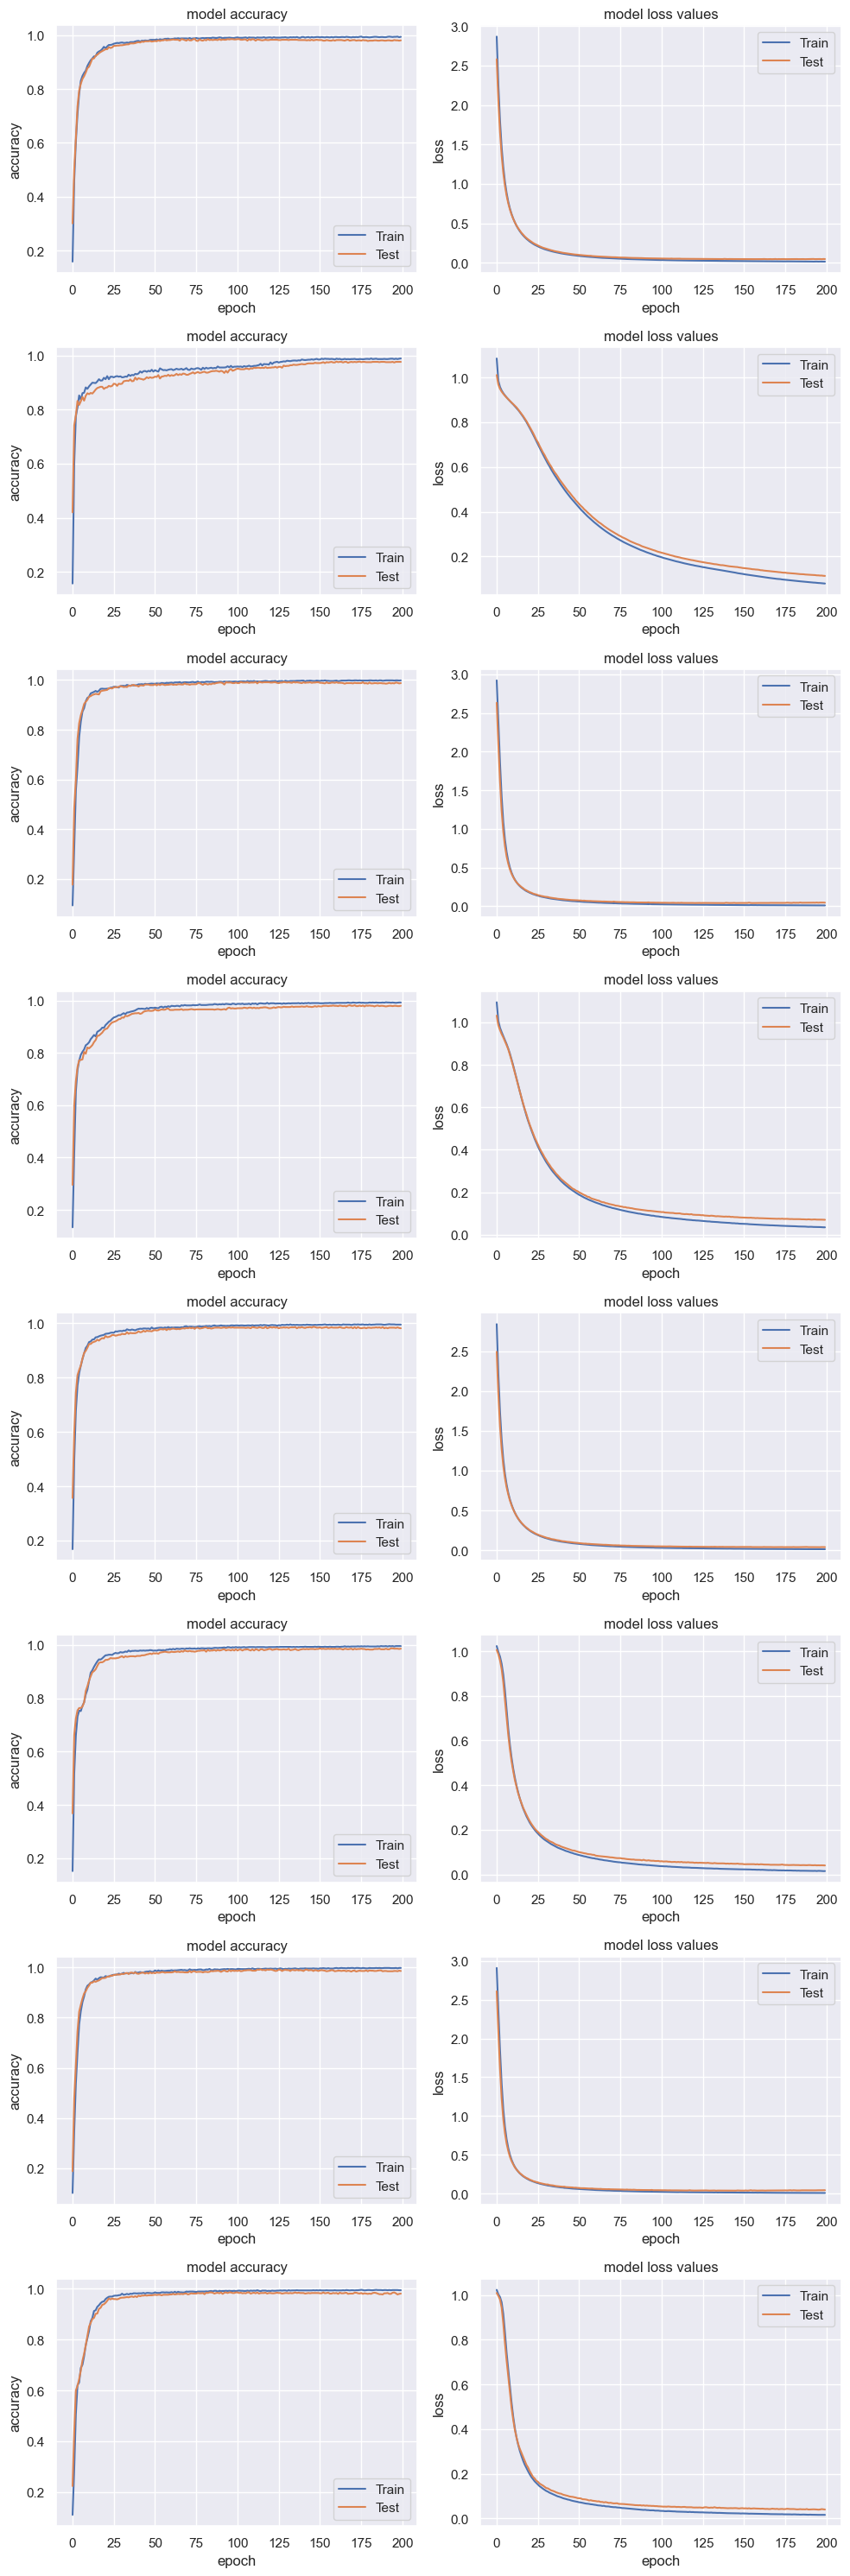

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axis = plt.subplots(8, 2, figsize=(10,30))


models = [model1, model2, model3, model4, model5, model6, model7, model8]
i = 0

for i in range(8):
    history = models[i].history
    
    #accuracy curve
    axis[i, 0].plot(history.epoch, history.history['accuracy'], label = 'Train')
    axis[i, 0].plot(history.epoch, history.history['val_accuracy'], label = 'Test')
    axis[i, 0].legend(loc = 'lower right')
    axis[i, 0].set_title('model accuracy')
    axis[i, 0].set(xlabel = 'epoch', ylabel = 'accuracy')
    
    #loss curve
    axis[i, 1].plot(history.epoch, history.history['loss'], label ='Train')
    axis[i, 1].plot(history.epoch, history.history['val_loss'], label ='Test')
    axis[i, 1].legend(loc = 'upper right')
    axis[i, 1].set_title('model loss values')
    axis[i, 1].set(xlabel = 'epoch', ylabel = 'loss')
    
    
figure.tight_layout()
plt.show()

## Model numerical performance

In [28]:
i = 1
for model in models:
    print(f"Model {i}:")
    print(f"Training accuracy: {np.mean(model.history.history['accuracy'])}")
    print(f"Testing accuracy: {np.mean(model.history.history['val_accuracy'])}")
    print(f"Difference: {np.mean(model.history.history['val_accuracy']) - np.mean(model.history.history['accuracy'])}")
    print()
    i += 1

Model 1:
Training accuracy: 0.9705038449913264
Testing accuracy: 0.9633750760555267
Difference: -0.007128768935799612

Model 2:
Training accuracy: 0.9496439861506224
Testing accuracy: 0.935392114520073
Difference: -0.014251871630549418

Model 3:
Training accuracy: 0.9744242993369698
Testing accuracy: 0.9704659806191921
Difference: -0.003958318717777742

Model 4:
Training accuracy: 0.9605492947250605
Testing accuracy: 0.9484887152910233
Difference: -0.012060579434037155

Model 5:
Training accuracy: 0.9743447525054216
Testing accuracy: 0.9674034827947616
Difference: -0.006941269710660003

Model 6:
Training accuracy: 0.969659146219492
Testing accuracy: 0.9618693898618221
Difference: -0.007789756357669875

Model 7:
Training accuracy: 0.9741515713185072
Testing accuracy: 0.9697784812003374
Difference: -0.004373090118169776

Model 8:
Training accuracy: 0.9651439955458045
Testing accuracy: 0.9574432570487261
Difference: -0.007700738497078419

